# AI Kit

This jupyter notebook series constitutes a miscellaneous collection of code-snippeds for generic tasks in ML/DL-projects. The purpose is to speed up and ease model development by providing content for copying / pasting / and further customization. Each section constitutes a separat jupyter notebook.

#### A - BASICS
1. **Data Preprocessing** - Imputation, Normalization
2. **Oulier Detection** - Univariate Z-Score, Isolation Forest, Elliptic Envelope, DBSCAN
3. **Dimensionality Reduction** - PCA, tSNE

#### B - MACHINE LEARNING (SkLearn)
1. **Model Selection** - Benchmarking Algorithms with default Hyperparameters
2. **Hyperparamter Tuning** - Random Search, Learning Curves

#### C - DEEP LEARNING (Keras)
1. **Neural Nets** - Keras Sequential Model
2. **CNNs** - from Scratch, Transferlearning
3. **RNNs** - from Scratch, Transferlearning
4. **Complex Model Graphs** - Functional Keras API

## Notebook A3 - Dimensionality Reduction

* [**Preprocess Data**](#pd)
* [**PCA**](#pca)
* [**tSNE**](#tsne)

Nice blog post on dimensionality reduction using PCA and tSNE: https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

### Preprocess Data<a name="pd"></a>

For details refer to previous notebook 1_DataPreprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

titanic = sns.load_dataset('titanic')

# Directly remove features 'alive' and 'embark_town' which duplicate 'survived' and 'embark'
titanic = titanic.drop(columns=['embark_town', 'alive'])

# Drop feature 'deck' with too many NAs
titanic = titanic.drop(columns='deck')

# Impute age with average
titanic.loc[titanic.age.isna(), 'age'] = titanic.age.mean()

# Impute embarked with most frequent
titanic.embarked.value_counts()

# One hot encode categorical features
titanic_categorical = titanic.loc[:, (titanic.dtypes=='object') | (titanic.dtypes=='category')]
titanic = titanic.drop(columns=titanic_categorical.columns)
titanic = titanic.join(pd.get_dummies(titanic_categorical, drop_first=True))

# Convert everything to float32
titanic = titanic.astype('float32')
titanic.head()

# Lognormalize 'price'
titanic['fare'] = np.log(titanic.fare+1)

# Normalize non-categorical features
titanic.loc[:, 'pclass':'fare'] = (titanic.loc[:, 'pclass':'fare'] - titanic.loc[:, 'pclass':'fare'].mean()) /\
                                                                     titanic.loc[:, 'pclass':'fare'].std()

### PCA<a name="pca"></a>

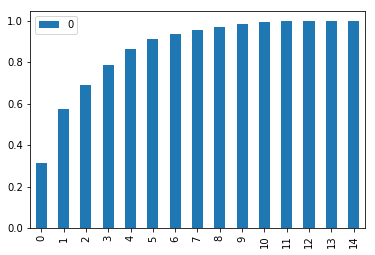

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=titanic.shape[1])
pca.fit(titanic)

# Explained variance per PCA-component
pd.DataFrame(pca.explained_variance_ratio_).cumsum().plot.bar()

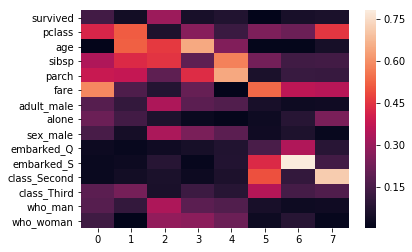

In [16]:
# Feature importance for top 8 components
sns.heatmap(np.abs(pca.components_[:8]).T, yticklabels=titanic.columns)

### tSNE<a name="tsne"></a>

t-Distributed stochastic neighbor embedding (tSNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding. Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects. For the same reason it is not recommended to use tSNE for more than 50 features. If the data is high dimensional, conduct a PCA before running the tSNE.

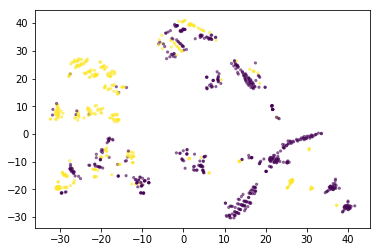

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_trans = pd.DataFrame(tsne.fit_transform(titanic))
tsne_trans.columns = ['tsne1', 'tsne2']
tsne_trans['survived'] = titanic.survived

plt.scatter(tsne_trans['tsne1'], tsne_trans['tsne2'], c=tsne_trans['survived'], s=5, alpha=.5)

This plot indicates that our target 'survived' follows the spatial clustering pattern of the data only weekly.